In [13]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os,sys
from PIL import Image
sys.path.append("..")

from utils import *
from errors import *

from skimage.color import rgb2gray
from skimage import feature
from scipy import ndimage as ndi
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
# Helper functions

def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
    return rimg

# Concatenate an image and its groundtruth
def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg

def img_crop(im, w, h):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
            list_patches.append(im_patch)
    return list_patches


Loading 20 images from images
Loading 20 images from groundtruth
Color images:
(11, 400, 400, 3)
(9, 400, 400, 3)
Gray images:
(11, 400, 400)
(9, 400, 400)


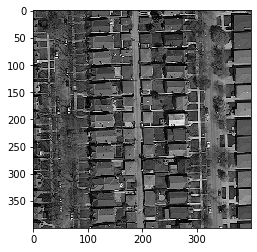

In [25]:
# Loaded a set of images
root_dir = "../../data/training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = min(20, len(files)) # Load maximum 20 images
print("Loading " + str(n) + " images from images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images from groundtruth")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]

n_train = 11 # Only use 11 images for training
n_test = n - n_train
imgs_tr = [imgs[i] for i in range(n_train)]
imgs_te = [imgs[i] for i in range(n_train, n)]
imgs_gray_tr = [rgb2gray(imgs[i]) for i in range(n_train)]
imgs_gray_te = [rgb2gray(imgs[i]) for i in range(n_train, n)]

print("Color images:")
print(np.shape(imgs_tr))
print(np.shape(imgs_te))
print("Gray images:")
print(np.shape(imgs_gray_tr))
print(np.shape(imgs_gray_te))
plt.imshow(imgs_gray_tr[0], cmap='Greys_r')

### -------- High pass filter --------

/Users/artur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


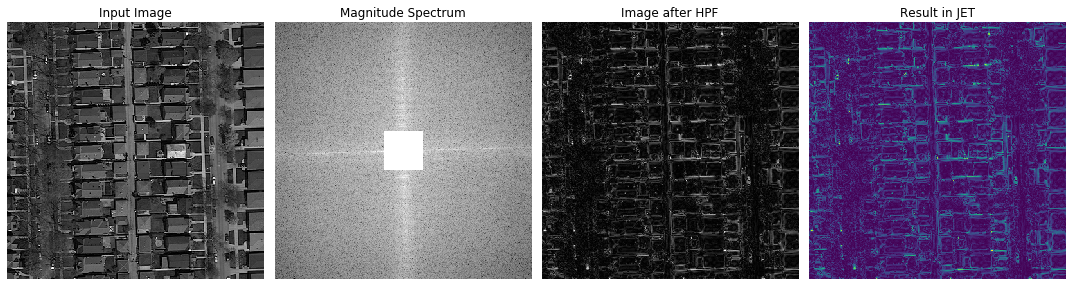

In [33]:

f = np.fft.fft2(imgs_gray_tr[0])
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

rows, cols = np.shape(imgs_gray_tr[0])
crow = int(rows/2)
ccol = int(cols/2)

# High pass filter
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
magnitude_spectrum2 = 20*np.log(np.abs(fshift))
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 6), sharex=True, sharey=True)

ax[0].imshow(imgs_gray_tr[0], cmap=cm.gray)
ax[0].axis('off')
ax[0].set_title('Input Image')
ax[1].imshow(magnitude_spectrum2, cmap=cm.gray)
ax[1].axis('off')
ax[1].set_title('Magnitude Spectrum')
ax[2].imshow(img_back, cmap=cm.gray)
ax[2].axis('off')
ax[2].set_title('Image after HPF')
ax[3].imshow(img_back)
ax[3].axis('off')
ax[3].set_title('Result in JET')
plt.tight_layout()
plt.show()



### -------- Low pass filter --------

/Users/artur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


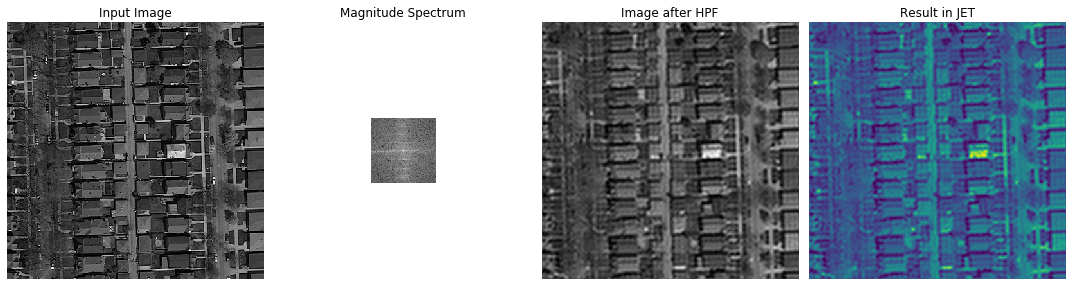

In [39]:

f = np.fft.fft2(imgs_gray_tr[0])
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

rows, cols = np.shape(imgs_gray_tr[0])
crow = int(rows/2)
ccol = int(cols/2)

# High pass filter
mask = np.zeros((rows,cols),np.uint8)
mask[crow-50:crow+50, ccol-50:ccol+50] = 1
fshift = fshift*mask

f_ishift = np.fft.ifftshift(fshift)
magnitude_spectrum2 = 20*np.log(np.abs(fshift))
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 6), sharex=True, sharey=True)

ax[0].imshow(imgs_gray_tr[0], cmap=cm.gray)
ax[0].axis('off')
ax[0].set_title('Input Image')
ax[1].imshow(magnitude_spectrum2, cmap=cm.gray)
ax[1].axis('off')
ax[1].set_title('Magnitude Spectrum')
ax[2].imshow(img_back, cmap=cm.gray)
ax[2].axis('off')
ax[2].set_title('Image after HPF')
ax[3].imshow(img_back)
ax[3].axis('off')
ax[3].set_title('Result in JET')
plt.tight_layout()
plt.show()